<a href="https://colab.research.google.com/github/danon6868/blastim-ml/blob/main/statistics_day_9/%D0%9D%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_3_%D0%94%D0%B5%D0%BD%D1%8C_9_%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0_2_%D0%9A%D0%BB%D0%B0%D1%81%D1%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! gdown 1j-NEMWgFI4zh9ebVi6r657CjbrPA6gk7

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = 12, 9
plt.rcParams["font.size"] = 14

# Данные по экспрессиям B и NK клеток

Данные можно скачать по [ссылке](https://drive.google.com/file/d/1j-NEMWgFI4zh9ebVi6r657CjbrPA6gk7/view?usp=drive_link).

In [ ]:
path_to_data = "drive/MyDrive/teaching/blastim-ml/statistics-day-9/immune_cells_data.csv"
data = pd.read_csv(path_to_data, index_col=0)
data.head()

In [ ]:
data["Cell_type"].value_counts()

In [ ]:
example_gene = "TMCC1"

In [ ]:
sns.histplot(data[example_gene], stat="density");

In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(data[example_gene])

In [ ]:
import statsmodels.api as sm

values = (data[example_gene] - data[example_gene].mean()) / data[example_gene].std()
sm.qqplot(values, line="45");

In [ ]:
b_cells = data.query("Cell_type == 'B_cell'").drop("Cell_type", axis=1)
nk_cells = data.query("Cell_type == 'NK_cell'").drop("Cell_type", axis=1)

## Потестируем что-то

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
alpha = 0.05

In [ ]:
_, p_values_ttest = ttest_ind(b_cells, nk_cells)

In [ ]:
(p_values_ttest < alpha).sum()

In [ ]:
_, p_values_mwu = mannwhitneyu(b_cells, nk_cells)

In [ ]:
(p_values_mwu < alpha).sum()

In [ ]:
de_ttest = b_cells.columns[(p_values_ttest < alpha)]
de_mwu = b_cells.columns[(p_values_mwu < alpha)]

In [ ]:
from matplotlib_venn import venn2

In [ ]:
common_genes = np.intersect1d(de_ttest, de_mwu)
ttest_unique_genes = np.setdiff1d(de_ttest, de_mwu)
mwu_unique_genes = np.setdiff1d(de_mwu, de_ttest)

In [ ]:
venn2(subsets=(len(ttest_unique_genes), len(mwu_unique_genes), len(common_genes)),
      set_labels=("ttest-genes", "MWU-genes"));

## Множественные сравнения

[Документация](https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html)

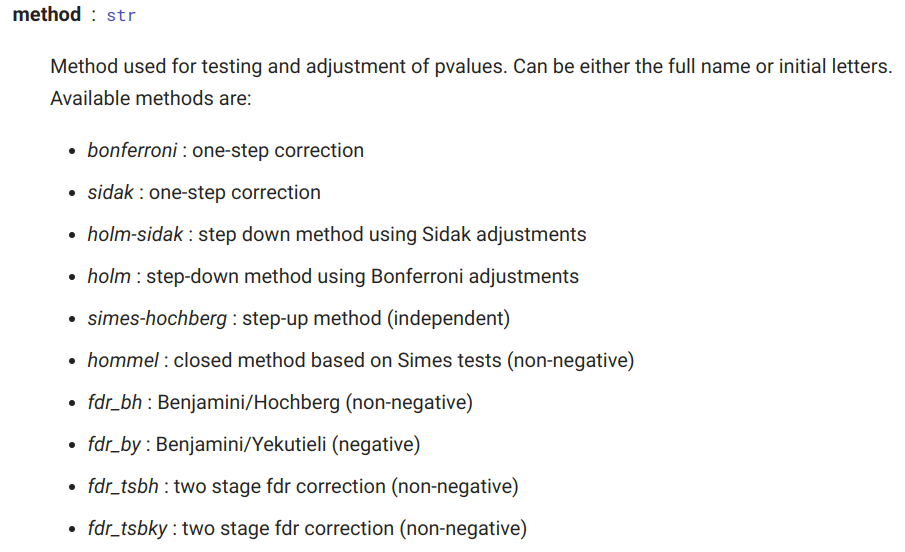

In [ ]:
from statsmodels.stats.multitest import multipletests

In [ ]:
_, bonf_corr_ttest_pvals, _, _ = multipletests(p_values_ttest, method="bonferroni")

In [ ]:
(bonf_corr_ttest_pvals < alpha).sum()

In [ ]:
_, bonf_corr_mwu_pvals, _, _ = multipletests(p_values_mwu, method="bonferroni")

In [ ]:
(bonf_corr_mwu_pvals < alpha).sum()